In [1]:
# run this cess only when the datasets are located in google drive and you are using google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# changing the directory to the dataset directory

#%cd /content/gdrive/'My Drive'/Colab\ Notebooks/tyndall/2021_05_19_PAM4_50GBaud/ideal
%cd /content/gdrive/'My Drive'/Colab\ Notebooks/tyndall/2021_06_24_NRZ_FibreDisp_25GBd

#%cd /content/gdrive/'My Drive'/Colab\ Notebooks/tyndall/2021_05_19_PAM4_50GBaud/ideal
#%cd /content/gdrive/'My Drive'/Colab\ Notebooks/tyndall/2021_05_19_PAM4_50GBaud/BandwidthLimited

/content/gdrive/My Drive/Colab Notebooks/tyndall/2021_06_24_NRZ_FibreDisp_25GBd


In [17]:
# Loading the basic packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import initializers
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



## **pre-processing**

The original data was in '.h5' format . We are converting the data to a csv file.

In [ ]:
import os

In [ ]:
os.listdir()

['OneDrive_1_6-25-2021.zip',
 'OneDrive_2_6-25-2021.zip',
 '20kmx_10dBm_Training.csv',
 '20kmx_10dBm_Testing.csv',
 'x20kmx_10dBm_Training_FFE_Mat_2sps_lmsx0_05x24.h5',
 'x20kmx_10dBm_Testing_FFE_Mat_2sps_lmsx0_05x24.h5',
 '25kmx_10dBm_Testing.csv',
 '25kmx_10dBm_Training.csv',
 'x25kmx_10dBm_Testing_FFE_Mat_2sps_lmsx0_05x24.h5',
 'x25kmx_10dBm_Training_FFE_Mat_2sps_lmsx0_05x24.h5']

In [ ]:
!unzip OneDrive_2_6-25-2021.zip

Archive:  OneDrive_2_6-25-2021.zip
 extracting: x20kmx_10dBm_Training_FFE_Mat_2sps_lmsx0_05x24.h5  
 extracting: x25kmx_10dBm_Training_FFE_Mat_2sps_lmsx0_05x24.h5  


In [ ]:
import h5py    
import numpy as np    

#Uncomment the required lines
# do this for both ideal and bandwidthlimited case

#f = h5py.File('Dataset_Testing_NNFFE_Py_2sps_lmsx0_05x24TrainPowerx_10_ideal.h5','r+')
f = h5py.File('x25kmx_10dBm_Testing_FFE_Mat_2sps_lmsx0_05x24.h5','r+', )  # reading the file
            


In [ ]:
list(f.keys())

['Test_X', 'Test_Y']

In [ ]:
# do this for all four cases ideal (training and testing data) and bandwidthlimited (trainng and testing data)

list(f.keys())
a = f['Test_X']
x = np.array(a)
x = x.T



b = f['Test_Y']
b = np.array(b)
b = b.T

c = pd.DataFrame(x)
c['y'] = b
c.to_csv("25kmx_10dBm_Testing.csv", index = False )  # saving the csv file

In [ ]:
test['y'] = test['y'].apply(lambda x : 0 if x < 0.5 else 1 )

In [ ]:
c.to_csv("25kmx_10dBm_Testing.csv", index = False )

## **Model**

In [3]:
# sample code to be used 

# Loading the basic packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import torch
import torch.nn as nn

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics



## make new csv file after binning

In [ ]:
#readng the training and testing data 

c = pd.read_csv("20kmx_10dBm_Training.csv")
test = pd.read_csv("20kmx_10dBm_Testing.csv")

In [ ]:
x = c 
df = c

In [ ]:
x['y'].unique()

array([ 0.99202604, -1.00790693, -1.00795478, -1.00796614, -1.00796613,
       -1.00796613, -1.00796613, -0.99283762,  1.00710672,  1.00715456,
        1.00716592,  1.00716591,  1.00716591,  0.9920374 , -0.99277842,
        0.99198955, -0.99278978,  1.00711807,  1.00715456,  0.9920374 ,
       -1.00790694, -1.00795478, -0.99283762,  1.00710672,  0.99202605,
       -0.99277842,  1.00711807,  0.99202604, -0.99277842,  0.99198955,
       -0.99278978, -0.99277842,  0.99198956, -1.00791829, -0.99282626,
        1.00710671,  1.00715456,  1.00716592,  0.9920374 , -0.99277842,
        1.00711807,  0.99202604,  1.00711807, -1.00790693, -0.99282627,
        1.00710671,  1.00715456,  0.9920374 , -1.00790694, -0.99282627,
        1.00710671,  0.99202605, -0.99277842,  0.9919782 , -1.00791829,
       -0.99282626,  1.00710671, -1.00791829, -0.99282626, -1.00790694,
       -1.00795478,  1.00715456,  0.9920374 , -1.00790694, -0.99282627,
       -1.00796614, -0.99283762,  1.00710672,  1.00715456,  1.00

In [ ]:
test['y'] = test['y'].apply(lambda x : 0 if x < 0.5 else 1 )

In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,y
0,-1.269887,-0.870965,-0.370474,0.558371,1.771264,1.260711,1.698550,0.901812,-0.349504,-0.254873,-0.135864,0.262701,0.241648,-0.819192,-1.233403,-1.239804,-1.255110,-1.234227,-1.402438,-1.070349,-0.169099,0.490033,2.169917,1.005460,-0.406692,-0.317140,-0.108985,0.451909,0.131427,-0.251838,-0.136197,0.329546,0.237468,-0.630081,-1.278042,-1.225422,-1.188209,-0.988103,-0.120884,0.351608,-0.124049,-0.157766,-0.165079,0.375931,0.029897,-0.223702,-0.197397,0.267249,1
1,-1.294342,-1.252654,-1.269887,-0.870965,-0.370474,0.558371,1.771264,1.260711,1.698550,0.901812,-0.349504,-0.254873,-0.135864,0.262701,0.241648,-0.819192,-1.233403,-1.239804,-1.255110,-1.234227,-1.402438,-1.070349,-0.169099,0.490033,2.169917,1.005460,-0.406692,-0.317140,-0.108985,0.451909,0.131427,-0.251838,-0.136197,0.329546,0.237468,-0.630081,-1.278042,-1.225422,-1.188209,-0.988103,-0.120884,0.351608,-0.124049,-0.157766,-0.165079,0.375931,0.029897,-0.223702,1
2,-1.260119,-1.228462,-1.294342,-1.252654,-1.269887,-0.870965,-0.370474,0.558371,1.771264,1.260711,1.698550,0.901812,-0.349504,-0.254873,-0.135864,0.262701,0.241648,-0.819192,-1.233403,-1.239804,-1.255110,-1.234227,-1.402438,-1.070349,-0.169099,0.490033,2.169917,1.005460,-0.406692,-0.317140,-0.108985,0.451909,0.131427,-0.251838,-0.136197,0.329546,0.237468,-0.630081,-1.278042,-1.225422,-1.188209,-0.988103,-0.120884,0.351608,-0.124049,-0.157766,-0.165079,0.375931,0
3,-1.220097,-1.252578,-1.260119,-1.228462,-1.294342,-1.252654,-1.269887,-0.870965,-0.370474,0.558371,1.771264,1.260711,1.698550,0.901812,-0.349504,-0.254873,-0.135864,0.262701,0.241648,-0.819192,-1.233403,-1.239804,-1.255110,-1.234227,-1.402438,-1.070349,-0.169099,0.490033,2.169917,1.005460,-0.406692,-0.317140,-0.108985,0.451909,0.131427,-0.251838,-0.136197,0.329546,0.237468,-0.630081,-1.278042,-1.225422,-1.188209,-0.988103,-0.120884,0.351608,-0.124049,-0.157766,0
4,-1.067120,-1.289327,-1.220097,-1.252578,-1.260119,-1.228462,-1.294342,-1.252654,-1.269887,-0.870965,-0.370474,0.558371,1.771264,1.260711,1.698550,0.901812,-0.349504,-0.254873,-0.135864,0.262701,0.241648,-0.819192,-1.233403,-1.239804,-1.255110,-1.234227,-1.402438,-1.070349,-0.169099,0.490033,2.169917,1.005460,-0.406692,-0.317140,-0.108985,0.451909,0.131427,-0.251838,-0.136197,0.329546,0.237468,-0.630081,-1.278042,-1.225422,-1.188209,-0.988103,-0.120884,0.351608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,-1.227892,-1.306784,-1.142948,-1.191621,-1.130645,-1.306452,-1.352577,-1.316008,-1.255445,-1.304385,-1.272234,-1.244943,-1.277168,-1.218506,-1.325625,-1.349760,-1.305695,-1.182856,-1.254305,-1.180597,-1.185005,-1.167478,-1.278490,-1.346220,-1.421817,-0.975097,-0.296003,0.402274,2.156720,1.031882,-0.331810,-0.375226,-0.144612,0.457952,0.036744,-0.142211,-0.321805,0.405045,0.207204,-0.662798,-1.373821,-0.980147,-0.271623,0.530139,1.685926,1.222108,1.695062,1.007947,0
16379,0.219768,-0.883553,-1.227892,-1.306784,-1.142948,-1.191621,-1.130645,-1.306452,-1.352577,-1.316008,-1.255445,-1.304385,-1.272234,-1.244943,-1.277168,-1.218506,-1.325625,-1.349760,-1.305695,-1.182856,-1.254305,-1.180597,-1.185005,-1.167478,-1.278490,-1.346220,-1.421817,-0.975097,-0.296003,0.402274,2.156720,1.031882,-0.331810,-0.375226,-0.144612,0.457952,0.036744,-0.142211,-0.321805,0.405045,0.207204,-0.662798,-1.373821,-0.980147,-0.271623,0.530139,1.685926,1.222108,0
16380,0.079000,0.387740,0.219768,-0.883553,-1.227892,-1.306784,-1.142948,-1.191621,-1.130645,-1.306452,-1.352577,-1.316008,-1.255445,-1.304385,-1.272234,-1.244943,-1.277168,-1.218506,-1.325625,-1.349760,-1.305695,-1.182856,-1.254305,-1.180597,-1.185005,-1.167478,-1.278490,-1.346220,-1.421817,-0.975097,-0.296003,0.402274,2.156720,1.031882,-0.331810,-0.375226,-0.144612,0

In [ ]:
test.to_csv("20km_10dbm_Testing.csv", index = False, )

In [ ]:
x = pd.DataFrame(x)

In [ ]:
# encoding the four output classes as 0, 1, 2, 3 

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder( )
test["y"] = lb_make.fit_transform(test["y"])

In [ ]:
x["y"].unique()

array([3, 2, 0, 1])

## **Ideal Case**

### **Plotting the histogram of the data( 11th and 12th sample point)**

In [ ]:
df = x

In [ ]:
z0 = df.loc[df['y'] == 0]
mu_0 = z0['11'].mean()
var_0 = z0['11'].std()


z1 = df.loc[df['y'] == 1]
mu_1 = z1['11'].mean()
var_1 = z1['11'].std()


z2 = df.loc[df['y'] == 2]
mu_2 = z2['11'].mean()
var_2 = z2['11'].std()

z3 = df.loc[df['y'] == 3]
mu_3 = z3['11'].mean()
var_3 = z3['11'].std()

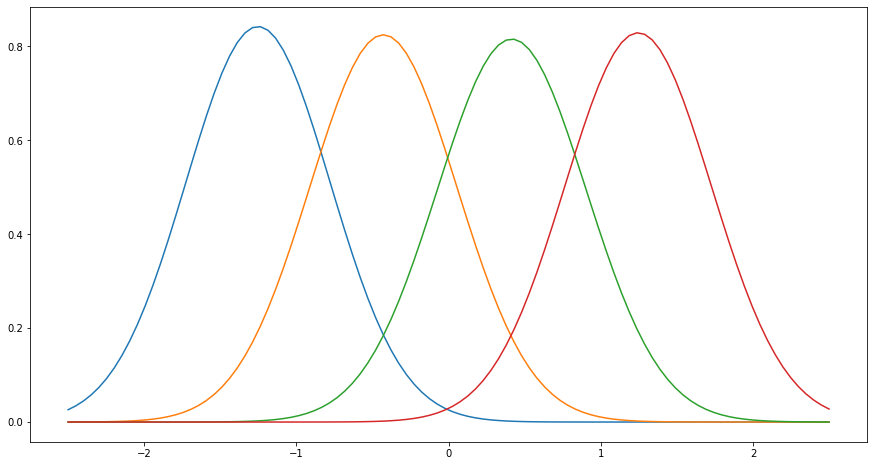

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.figure(figsize=(15,8))
x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, stats.norm.pdf(x, mu_0, np.sqrt(var_0)) , )
plt.plot(x, stats.norm.pdf(x, mu_1, np.sqrt(var_1)))
plt.plot(x, stats.norm.pdf(x, mu_2, np.sqrt(var_2)))
plt.plot(x, stats.norm.pdf(x, mu_3, np.sqrt(var_3)))
plt.show()

In [ ]:
z0 = df.loc[df['y'] == 0]
mu_0 = z0['12'].mean()
var_0 = z0['12'].std()


z1 = df.loc[df['y'] == 1]
mu_1 = z1['12'].mean()
var_1 = z1['12'].std()


z2 = df.loc[df['y'] == 2]
mu_2 = z2['12'].mean()
var_2 = z2['12'].std()

z3 = df.loc[df['y'] == 3]
mu_3 = z3['12'].mean()
var_3 = z3['12'].std()

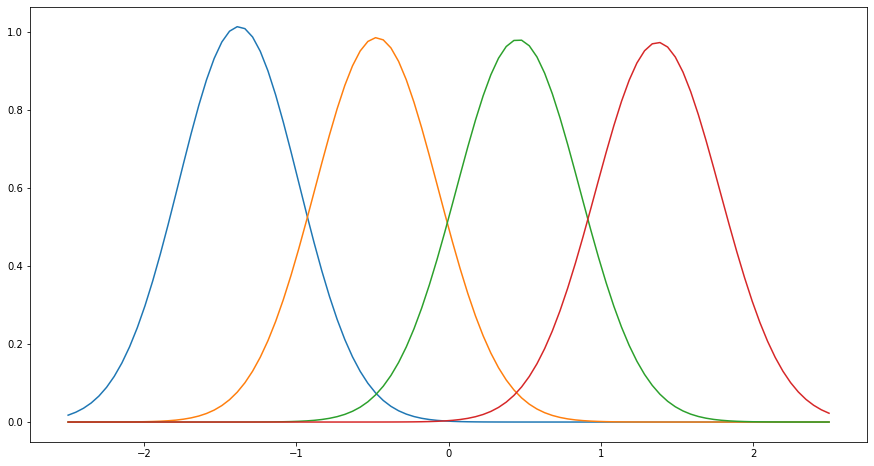

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.figure(figsize=(15,8))
x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, stats.norm.pdf(x, mu_0, np.sqrt(var_0)) , )
plt.plot(x, stats.norm.pdf(x, mu_1, np.sqrt(var_1)))
plt.plot(x, stats.norm.pdf(x, mu_2, np.sqrt(var_2)))
plt.plot(x, stats.norm.pdf(x, mu_3, np.sqrt(var_3)))
plt.show()

### **Naive Bayes Classifier**

In [ ]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# loading the iris dataset 
  
# X -> features, y -> label 
X = df.drop(labels=["y"], axis = 1)
y = df["y"]
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 ) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions)

1.0


In [ ]:
x_test = test.drop(labels=["y"], axis = 1)
y_test = test["y"]

In [ ]:
gnb_predictions = gnb.predict(x_test) 
  
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test) 
print(accuracy) 

0.9998667554963357


## **Band-limited case**

In [ ]:
c = pd.read_csv("bandwidthlimited.csv")
test = pd.read_csv("bandwidthlimited_test.csv")


In [ ]:
x = c 
df = c

In [ ]:
x_test = test.drop(labels=["y"], axis = 1)
y_test = test["y"]

In [ ]:
x['y'].unique()

array([ 1.33826895,  0.44258654, -1.34877829, -0.45309588])

In [ ]:
x = pd.DataFrame(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder( )
df["y"] = lb_make.fit_transform(df["y"])

### **Plotting the histogram of the data( 11th and 12th sample point)**

In [ ]:
df = x

In [ ]:
z0 = df.loc[df['y'] == 0]
mu_0 = z0['11'].mean()
var_0 = z0['11'].std()


z1 = df.loc[df['y'] == 1]
mu_1 = z1['11'].mean()
var_1 = z1['11'].std()


z2 = df.loc[df['y'] == 2]
mu_2 = z2['11'].mean()
var_2 = z2['11'].std()

z3 = df.loc[df['y'] == 3]
mu_3 = z3['11'].mean()
var_3 = z3['11'].std()

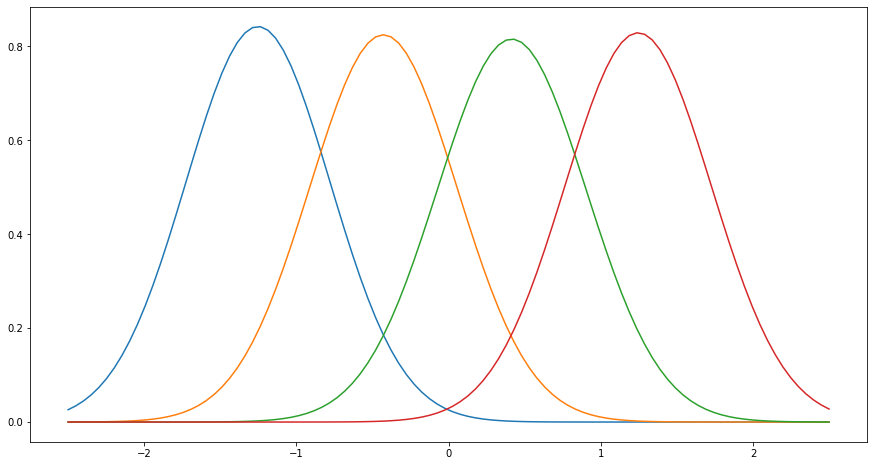

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.figure(figsize=(15,8))
x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, stats.norm.pdf(x, mu_0, np.sqrt(var_0)) , )
plt.plot(x, stats.norm.pdf(x, mu_1, np.sqrt(var_1)))
plt.plot(x, stats.norm.pdf(x, mu_2, np.sqrt(var_2)))
plt.plot(x, stats.norm.pdf(x, mu_3, np.sqrt(var_3)))
plt.show()

In [ ]:
z0 = df.loc[df['y'] == 0]
mu_0 = z0['12'].mean()
var_0 = z0['12'].std()


z1 = df.loc[df['y'] == 1]
mu_1 = z1['12'].mean()
var_1 = z1['12'].std()


z2 = df.loc[df['y'] == 2]
mu_2 = z2['12'].mean()
var_2 = z2['12'].std()

z3 = df.loc[df['y'] == 3]
mu_3 = z3['12'].mean()
var_3 = z3['12'].std()

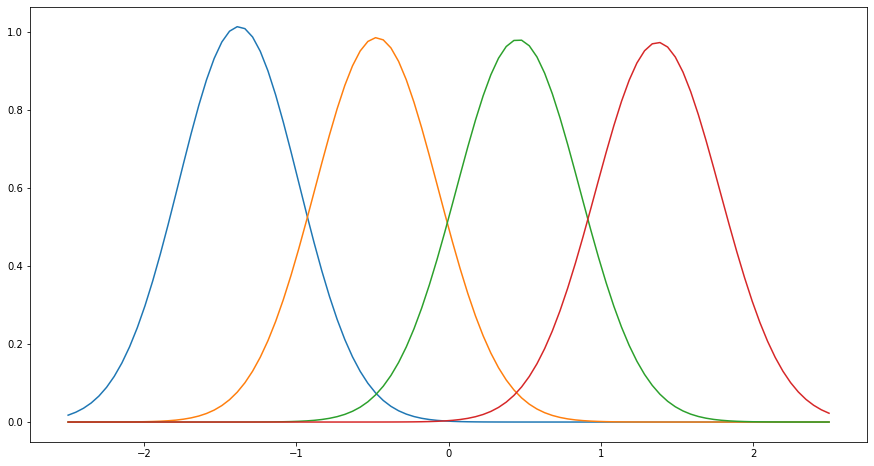

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.figure(figsize=(15,8))
x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, stats.norm.pdf(x, mu_0, np.sqrt(var_0)) , )
plt.plot(x, stats.norm.pdf(x, mu_1, np.sqrt(var_1)))
plt.plot(x, stats.norm.pdf(x, mu_2, np.sqrt(var_2)))
plt.plot(x, stats.norm.pdf(x, mu_3, np.sqrt(var_3)))
plt.show()

In [ ]:
z0 = df.loc[df['y'] == 0]
mu_0 = z0['11'].mean()
var_0 = z0['11'].std()


z1 = df.loc[df['y'] == 1]
mu_1 = z1['11'].mean()
var_1 = z1['11'].std()


z2 = df.loc[df['y'] == 2]
mu_2 = z2['11'].mean()
var_2 = z2['11'].std()

z3 = df.loc[df['y'] == 3]
mu_3 = z3['11'].mean()
var_3 = z3['11'].std()

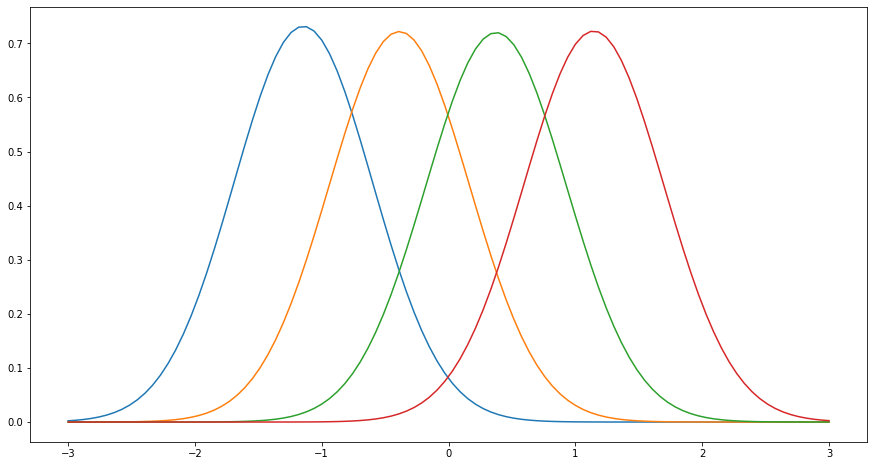

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.figure(figsize=(15,8))
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, mu_0, np.sqrt(var_0)) , )
plt.plot(x, stats.norm.pdf(x, mu_1, np.sqrt(var_1)))
plt.plot(x, stats.norm.pdf(x, mu_2, np.sqrt(var_2)))
plt.plot(x, stats.norm.pdf(x, mu_3, np.sqrt(var_3)))
plt.show()

In [ ]:
z0 = df.loc[df['y'] == 0]
mu_0 = z0['12'].mean()
var_0 = z0['12'].std()


z1 = df.loc[df['y'] == 1]
mu_1 = z1['12'].mean()
var_1 = z1['12'].std()


z2 = df.loc[df['y'] == 2]
mu_2 = z2['12'].mean()
var_2 = z2['12'].std()

z3 = df.loc[df['y'] == 3]
mu_3 = z3['12'].mean()
var_3 = z3['12'].std()

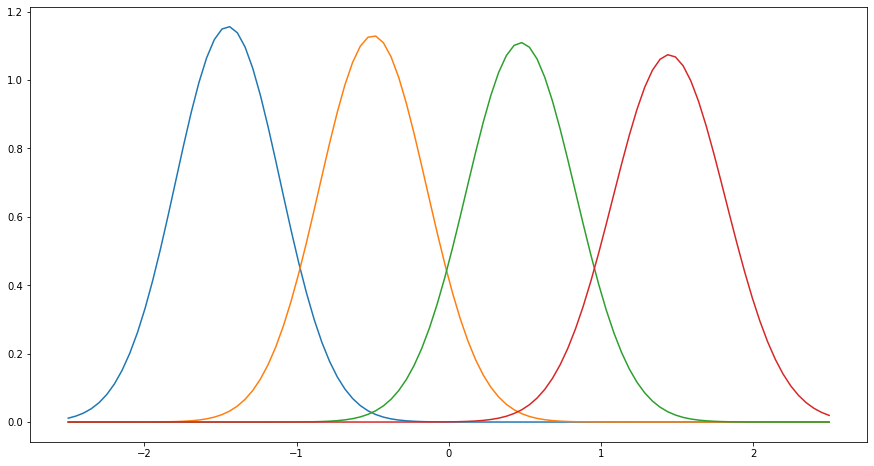

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.figure(figsize=(15,8))
x = np.linspace(-2.5, 2.5, 100)
plt.plot(x, stats.norm.pdf(x, mu_0, np.sqrt(var_0)) , )
plt.plot(x, stats.norm.pdf(x, mu_1, np.sqrt(var_1)))
plt.plot(x, stats.norm.pdf(x, mu_2, np.sqrt(var_2)))
plt.plot(x, stats.norm.pdf(x, mu_3, np.sqrt(var_3)))
plt.show()

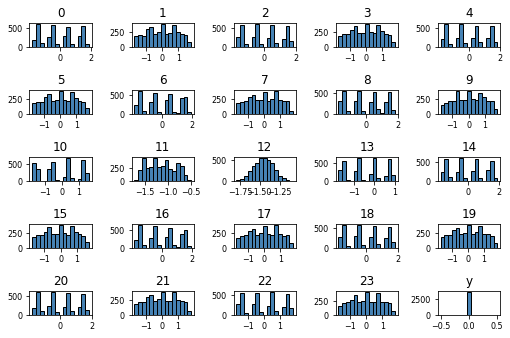

In [ ]:
z0.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

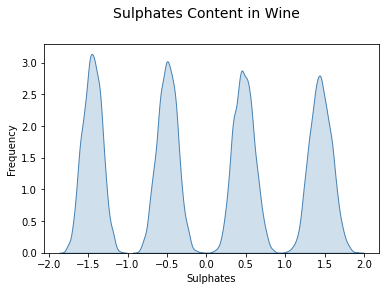

In [ ]:
# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(z0['12'], ax=ax1, shade=True, color='steelblue')
sns.kdeplot(z1['12'], ax=ax1, shade=True, color='steelblue')
sns.kdeplot(z2['12'], ax=ax1, shade=True, color='steelblue')
sns.kdeplot(z3['12'], ax=ax1, shade=True, color='steelblue')

### **Naive Bayes clasifier**

In [ ]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# loading the iris dataset 
  
# X -> features, y -> label 
X = df.drop(labels=["y"], axis = 1)
y = df["y"]
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 ) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions)

1.0


In [ ]:
cm

array([[892,   0,   0,   0],
       [  0, 950,   0,   0],
       [  0,   0, 968,   0],
       [  0,   0,   0, 940]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder( )
test["y"] = lb_make.fit_transform(test["y"])

In [ ]:
x_test = test.drop(labels=["y"], axis = 1)
y_test = test["y"]

In [ ]:
gnb_predictions = gnb.predict(x_test) 
  
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test) 
print(accuracy)

1.0


## **Linear Model**

### **Ideal**

In [ ]:
c = pd.read_csv("20km_10dbm_Training.csv")
test = pd.read_csv("20km_10dbm_Testing.csv")

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# lb_make = LabelEncoder( )
# c["y"] = lb_make.fit_transform(c["y"])

# from sklearn.preprocessing import LabelEncoder
# lb_make = LabelEncoder( )
# test["y"] = lb_make.fit_transform(test["y"])

In [ ]:
df = c 

# X -> features, y -> label 
X = df.drop(labels=["y"], axis = 1)
y = df["y"]

x_test = test.drop(labels=["y"], axis = 1)
y_test = test["y"]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-3.61070012e-05  9.97203713e-04 -1.68519844e-03  4.30054547e-04
  1.79744867e-04  1.01850624e-03 -1.93030245e-03 -1.16109767e-03
  4.20724309e-03 -2.13377137e-04 -4.09819845e-03  2.90920426e-04
  6.42987070e-03  3.69714758e-05 -1.25924161e-02 -1.54124036e-03
  2.78491543e-02  5.36628700e-03 -5.81556931e-02 -9.00002885e-03
  1.13763427e-01  2.09815981e-02 -2.42748454e-01  2.58332672e-02
  5.27484453e-01  1.95073876e-01 -2.21192708e-01 -6.11905454e-02
  8.63765965e-02  4.17793600e-02 -4.28439838e-02 -2.68759022e-02
  2.82109348e-02  1.33421243e-02 -1.42005942e-02 -9.25879677e-03
  9.32786993e-03  4.95126477e-03 -5.27977318e-03 -3.51897741e-03
  3.61299415e-03  1.99154833e-03 -2.18205798e-03 -8.56246454e-04
  1.25860634e-03  3.74510008e-04 -1.24946948e-03  6.68671252e-04]
Mean squared error: 0.26
Coefficient of determination: -0.06


In [ ]:
w = np.array( regr.coef_)

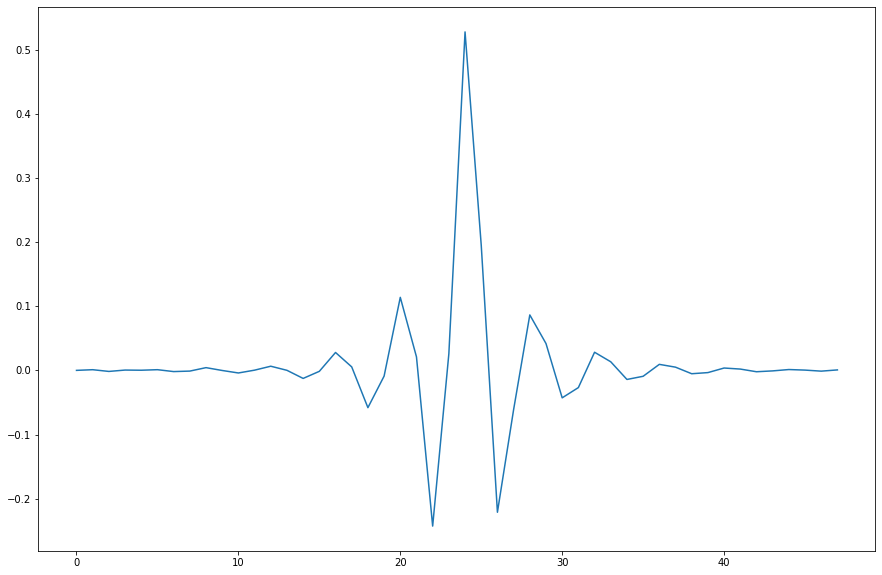

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(w)

In [ ]:
y_pred.size

16383

(array([0.00540876, 0.02379855, 0.06057814, 0.08221319, 0.13630081,
        0.18065266, 0.37212284, 0.51058715, 0.61119013, 0.68799456,
        0.74316393, 0.94004288, 1.03307359, 0.89244577, 0.73883692,
        0.54953024, 0.52681344, 0.54736674, 0.54736674, 0.47488932,
        0.50085138, 0.6414792 , 0.69881208, 0.65121497, 0.65878724,
        0.51707767, 0.40782067, 0.22824977, 0.15360885, 0.12981029,
        0.17091689, 0.23690379, 0.28233739, 0.28450089, 0.25962059,
        0.23257678, 0.28233739, 0.23149502, 0.16334462, 0.14928184,
        0.10276648, 0.12872854, 0.20228771, 0.19471544, 0.2001242 ,
        0.13630081, 0.109257  , 0.0659869 , 0.03137082, 0.00540876]),
 array([-0.65165557, -0.59522965, -0.53880372, -0.4823778 , -0.42595187,
        -0.36952595, -0.31310003, -0.2566741 , -0.20024818, -0.14382225,
        -0.08739633, -0.0309704 ,  0.02545552,  0.08188144,  0.13830737,
         0.19473329,  0.25115922,  0.30758514,  0.36401107,  0.42043699,
         0.47686292,  0.53

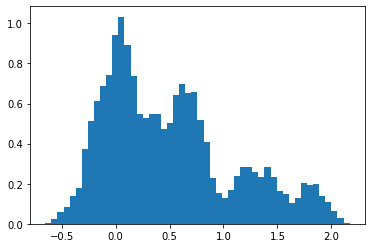

In [ ]:
plt.hist(y_pred,50,density=True)

## **LR**

In [ ]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [ ]:
print(report, sep="/n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16362
           1       1.00      1.00      1.00     16375

    accuracy                           1.00     32737
   macro avg       1.00      1.00      1.00     32737
weighted avg       1.00      1.00      1.00     32737



### **Bandwidth-limited**

In [ ]:
# changing the directory for Bandwidthlmited case
%cd /content/gdrive/'My Drive'/Colab\ Notebooks/tyndall/2021_05_19_PAM4_50GBaud/BandwidthLimited

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/tyndall/2021_05_19_PAM4_50GBaud/BandwidthLimited'
/content


In [ ]:
import os
os.listdir()

['Bandwidthlimited.csv',
 'bandwidthlimited.csv',
 'Dataset_Testing_NNFFE_Py_2sps_lmsx0_05x24TrainPowerx_10_BW_limited.h5',
 'bandwidthlimited_test.csv',
 'Dataset_Training_NNFFE_Py_2sps_lmsx0_05x24TrainPowerx_10_BW_limited.h5']

In [ ]:
c = pd.read_csv("Bandwidthlimited.csv")
test = pd.read_csv("bandwidthlimited_test.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder( )
c["y"] = lb_make.fit_transform(c["y"])

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder( )
test["y"] = lb_make.fit_transform(test["y"])

In [ ]:
df = c 

# X -> features, y -> label 
X = df.drop(labels=["y"], axis = 1)
y = df["y"]

x_test = test.drop(labels=["y"], axis = 1)
y_test = test["y"]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.86425156e-04 -4.94243283e-03  4.93221638e-03 -1.47213706e-03
  8.33211253e-04 -6.11120765e-03 -5.97232016e-04  1.51427989e-02
  1.00791621e-02 -9.84918754e-02 -3.93069472e-02  4.92658818e-01
  6.18952423e-01  8.68325536e-02 -1.13739455e-01 -1.66801071e-02
  1.62531761e-02  9.70296350e-03 -1.09418224e-02  2.26288910e-03
 -1.68076668e-03 -7.99714497e-03  6.71059617e-03 -1.63031401e-03]
Mean squared error: 0.00
Coefficient of determination: 1.00


In [ ]:
w = np.array( regr.coef_)

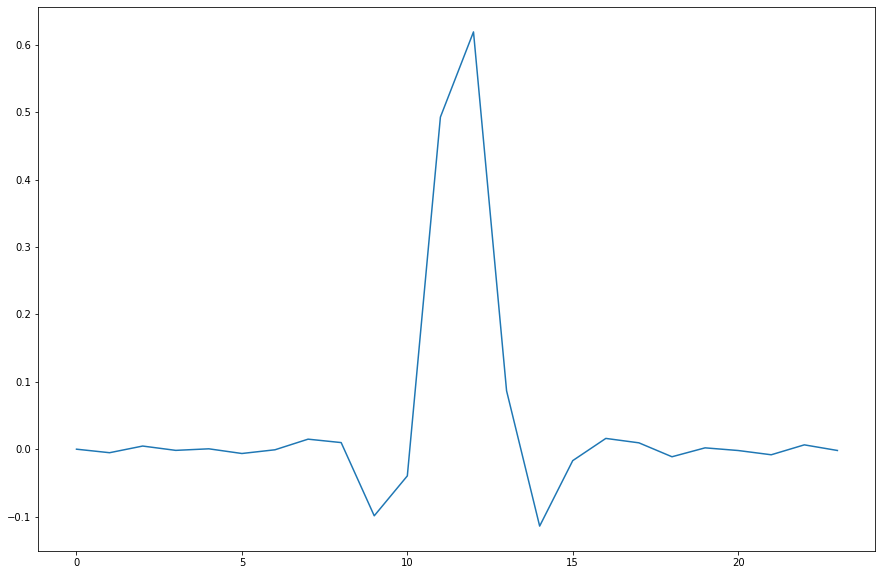

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(w)

In [ ]:
y_pred.size

15010

(array([4.76138266e-02, 5.19865250e-01, 1.65482340e+00, 1.23407265e+00,
        2.35154001e-01, 1.06888182e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.26322397e-02, 2.62361902e-01,
        1.09025946e+00, 1.47311349e+00, 6.16064614e-01, 9.13408102e-02,
        4.85855374e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.71710747e-03, 1.41869769e-01, 7.63764647e-01, 1.43230164e+00,
        1.02612655e+00, 2.64305323e-01, 2.72079009e-02, 1.94342149e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.71710747e-04, 1.94342149e-03, 4.85855374e-02,
        3.26494811e-01, 1.08540090e+00, 1.33804570e+00, 7.01575159e-01,
        1.45756612e-01, 1.65190827e-02]),
 array([-0.17411632, -0.10555451, -0.03699269,  0.03156912,  0.10013094,
         0.16869275, 

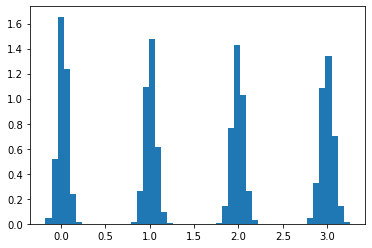

In [ ]:
plt.hist(y_pred,50,density=True)

(array([3701.,    0.,    0., 3783.,    0.,    0., 3743.,    0.,    0.,
        3773.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

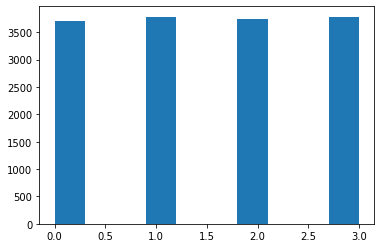

In [ ]:
plt.hist(c['y'])

## **Neural Network**

In [ ]:

from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# load dataset

df = pd.read_csv("20km_10dbm_Training.csv")
test = pd.read_csv("20km_10dbm_Testing.csv")

X = df.drop(labels=["y"], axis = 1)
y = df["y"]
Y = y 

In [ ]:
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# # convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

In [ ]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=48, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
estimator = KerasClassifier(
  build_fn=baseline_model, epochs=2, batch_size=5, verbose=0)


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 100.00% (0.00%)


In [ ]:

x_test = test.drop(labels=["y"], axis = 1)
y_test = test["y"]
Y = y_test 

In [ ]:
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(y)

In [ ]:
# encoder = LabelEncoder()
# encoder.fit(y_test)
# encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
y_test = np_utils.to_categorical(y_test)

In [ ]:
#input_dim = len(data.columns) - 1
input_dim = 48

model = Sequential()
model.add(Dense(32, input_dim = input_dim , activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
model.summary()

model.fit(X,y_train, epochs = 2, batch_size = 50)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_61 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_62 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_63 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 1026      
Total params: 79,074
Trainable params: 79,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
655/655 [==============================] - 3s 3ms/step - loss: 0.1307 - accuracy: 0.9349
Epoch 2/2
655/65

In [ ]:
scores = model.evaluate(x_test, y_test)

512/512 [==============================] - 1s 1ms/step - loss: 1.9939 - accuracy: 0.7586


## **LSTM**

In [ ]:

from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("20km_10dbm_Training.csv")
test = pd.read_csv("20km_10dbm_Testing.csv")

train_X = df.drop(labels=["y"], axis = 1)
train_y = df["y"]



test_X = df.drop(labels=["y"], axis = 1)
test_y = df["y"]


In [ ]:
trainX = train_X
testX = test_X

In [ ]:

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(train_y)
# encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
trainy = np_utils.to_categorical(train_y)

In [ ]:

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(test_y)
# encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
testy = np_utils.to_categorical(test_y)

In [ ]:
import keras.utils

In [ ]:
from tensorflow.keras.utils import to_categorical

trainy = to_categorical(train_y, dtype ="uint8")
testy = to_categorical(test_y, dtype ="uint8")

In [ ]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
#from keras.utils import to_categorical
from matplotlib import pyplot


In [ ]:
trainX = np.array(trainX)
trainX = trainX.reshape(trainX.shape[0],-1,1)

In [ ]:
testX = np.array(testX)
testX = trainX.reshape(testX.shape[0],-1,1)

In [ ]:
trainy.shape

(32737, 2)

In [ ]:


# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 3, 4
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment( trainX, trainy, testX, testy , repeats=1 ):
	# load data
#	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment( trainX, trainy, testX, testy)

>#1: 56.480
[56.48043751716614]
Accuracy: 56.480% (+/-0.000)


## **NN settings**

In [ ]:
df = pd.read_csv("20km_10dbm_Training.csv")
test = pd.read_csv("20km_10dbm_Testing.csv")

train_X = df.drop(labels=["y"], axis = 1)
train_y = df["y"]



test_X = df.drop(labels=["y"], axis = 1)
test_y = df["y"]


In [ ]:
batch_size = 11
epoch = 2
hidden_units = 256 

In [ ]:
# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(train_y)

In [ ]:
#input_dim = len(data.columns) - 1
input_dim = 48
initializer = tf.keras.initializers.GlorotNormal()

model = tf.keras.models.Sequential([ 
tf.keras.layers.InputLayer (input_shape=(48, ))  , 
tf.keras.layers.Dense(20 , activation='tanh' , kernel_initializer= initializer  , kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1) ) ,
tf.keras.layers.Dropout(rate = 0.2 , noise_shape=None, seed=None,) , 
tf.keras.layers.Dense(16 , activation= 'tanh' , kernel_initializer= initializer  , kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1) )  ,
tf.keras.layers.Dropout(rate = 0.2 , noise_shape=None, seed=None,) , 
tf.keras.layers.Dense(8 , activation= 'tanh' , kernel_initializer= initializer , kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1) )  ,
tf.keras.layers.Dropout(rate = 0.2 , noise_shape=None, seed=None,) , 
tf.keras.layers.Dense(1 , activation= 'linear'  , kernel_initializer= initializer  , kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1) )  ,
        ]   )



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                980       
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                336       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile( optimizer = opt , loss = 'mean_squared_error' , metrics=['accuracy']   )


In [ ]:

model.fit(train_X,train_y,  epochs=100 , batch_size = 1024 , )

In [ ]:
scores = model.evaluate(test_X, test_y)

1024/1024 [==============================] - 1s 1ms/step - loss: 0.2467 - accuracy: 1.0000


In [ ]:
dummy_y = np_utils.to_categorical(train_y)

## **25 Km**

In [ ]:
import os

In [ ]:
os.listdir()

['OneDrive_1_6-25-2021.zip',
 'OneDrive_2_6-25-2021.zip',
 '20kmx_10dBm_Training.csv',
 '20kmx_10dBm_Testing.csv',
 'x20kmx_10dBm_Training_FFE_Mat_2sps_lmsx0_05x24.h5',
 'x20kmx_10dBm_Testing_FFE_Mat_2sps_lmsx0_05x24.h5',
 '25kmx_10dBm_Testing.csv',
 '25kmx_10dBm_Training.csv',
 'x25kmx_10dBm_Testing_FFE_Mat_2sps_lmsx0_05x24.h5',
 'x25kmx_10dBm_Training_FFE_Mat_2sps_lmsx0_05x24.h5',
 '20km_10dbm_Training.csv',
 '20km_10dbm_Testing.csv']

In [ ]:
test = pd.read_csv("25kmx_10dBm_Testing.csv")
train = pd.read_csv("25kmx_10dBm_Training.csv")

In [ ]:
test['y'] = test['y'].apply(lambda x : 0 if x < 0.5 else 1 )
train['y'] = train['y'].apply(lambda x : 0 if x < 0.5 else 1 )


In [ ]:
train.to_csv("25kmx_10dBm_Training.csv")
test.to_csv("25kmx_10dBm_Testing.csv")


In [ ]:

from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv("25kmx_10dBm_Training.csv")
test = pd.read_csv("25kmx_10dBm_Testing.csv")

train_X = df.drop(labels=["y"], axis = 1)
train_y = df["y"]



test_X = df.drop(labels=["y"], axis = 1)
test_y = df["y"]


In [5]:
trainX = train_X
testX = test_X

In [ ]:
# testy = test_y
# trainy = train_y


In [6]:

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(train_y)
# encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
trainy = np_utils.to_categorical(train_y)

NameError: ignored

In [7]:

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(test_y)
# encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
testy = np_utils.to_categorical(test_y)

NameError: ignored

In [8]:
import keras.utils

In [9]:
from tensorflow.keras.utils import to_categorical

trainy = to_categorical(train_y, dtype ="uint8")
testy = to_categorical(test_y, dtype ="uint8")

In [10]:
trainy.shape

(32737, 2)

In [11]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
#from keras.utils import to_categorical
from matplotlib import pyplot


In [12]:
trainX = np.array(trainX)
trainX = trainX.reshape(trainX.shape[0],-1,1)

In [13]:
testX = np.array(testX)
testX = trainX.reshape(testX.shape[0],-1,1)

In [14]:
trainy.shape

(32737, 2)

In [15]:
trainy.shape

(32737, 2)

In [20]:
# def evaluate_model(trainX, trainy, testX, testy):
# 	verbose, epochs, batch_size = 0, 1, 1024
# 	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 1 #trainy.shape[1]
# 	model = Sequential()
# 	model.add(LSTM(200, input_shape=(n_timesteps,n_features)))
# 	model.add(Dropout(0.2))
# 	model.add(Dense(16, activation='tanh'))
# #  model.add(Dropout(0.2))
# 	model.add(Dense(8, activation='tanh'))
# 	model.add(Dense(n_outputs, activation='softmax'))
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	# fit network
# 	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# 	# evaluate model
# 	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
# 	return accuracy

initializer = tf.keras.initializers.GlorotNormal()
def evaluate_model(trainX, trainy, testX, testy):
  verbose, epochs, batch_size = 0, 5, 1024
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 2     #trainy.shape[1]
  model = tf.keras.Sequential()
  model.add(LSTM(250, input_shape=(n_timesteps,n_features)) , )
 # model.add(Dropout(0.2))
  model.add(Dense(16, activation='tanh' , kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1)  ) )
  model.add(Dropout(0.2))
  model.add(  Dense(32, activation='tanh',  kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1)    )  )
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='tanh' ,     kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1)  )          )
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='tanh' , kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1) )  )
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='tanh' , kernel_regularizer= tf.keras.regularizers.l2( l2 = 0.1) ) )
  model.add(Dropout(0.2))
  model.add(Dense(n_outputs, activation='softmax'))




  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
  return accuracy

32/32 [==============================] - 21s 657ms/step - loss: 0.0306 - accuracy: 0.9562
>#1: 95.620
32/32 [==============================] - 21s 654ms/step - loss: 0.0281 - accuracy: 0.9527
>#2: 95.271
32/32 [==============================] - 21s 656ms/step - loss: 0.0485 - accuracy: 0.9374
>#3: 93.738
32/32 [==============================] - 21s 657ms/step - loss: 0.0239 - accuracy: 0.9633
>#4: 96.334
32/32 [==============================] - 21s 648ms/step - loss: 0.0367 - accuracy: 0.9420
>#5: 94.202
[95.61963677406311, 95.27140259742737, 93.73797178268433, 96.33442163467407, 94.20228004455566]
Accuracy: 95.033% (+/-0.945)


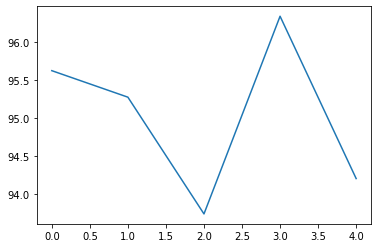

In [21]:

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment( trainX, trainy, testX, testy , repeats=5 ):
	# load data
#	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	plt.plot(scores)
	summarize_results(scores)
  

# run the experiment
run_experiment( trainX, trainy, testX, testy)

In [33]:
# def evaluate_model(trainX, trainy, testX, testy):
# 	verbose, epochs, batch_size = 0, 1, 1024
# 	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 1 #trainy.shape[1]
# 	model = Sequential()
# 	model.add(LSTM(200, input_shape=(n_timesteps,n_features)))
# 	model.add(Dropout(0.2))
# 	model.add(Dense(16, activation='tanh'))
# #  model.add(Dropout(0.2))
# 	model.add(Dense(8, activation='tanh'))
# 	model.add(Dense(n_outputs, activation='softmax'))
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	# fit network
# 	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# 	# evaluate model
# 	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
# 	return accuracy

initializer = tf.keras.initializers.GlorotNormal()
def evaluate_model(trainX, trainy, testX, testy):
  verbose, epochs, batch_size = 0, 25, 1024
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 2     #trainy.shape[1]
  model = tf.keras.Sequential()
  model.add(LSTM(16, input_shape=(n_timesteps,n_features)) , )
  model.add(Dropout(0.5))
  model.add(Dense(n_outputs, activation='softmax'))




  #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
  return accuracy

32/32 [==============================] - 1s 25ms/step - loss: 0.0179 - accuracy: 0.9781
>#1: 97.807
32/32 [==============================] - 1s 24ms/step - loss: 0.0358 - accuracy: 0.9519
>#2: 95.186
32/32 [==============================] - 1s 25ms/step - loss: 0.0239 - accuracy: 0.9699
>#3: 96.994
32/32 [==============================] - 1s 25ms/step - loss: 0.0201 - accuracy: 0.9719
>#4: 97.187
32/32 [==============================] - 1s 26ms/step - loss: 0.0187 - accuracy: 0.9749
>#5: 97.489
[97.80676364898682, 95.18587589263916, 96.99422717094421, 97.18666672706604, 97.48907685279846]
Accuracy: 96.933% (+/-0.916)


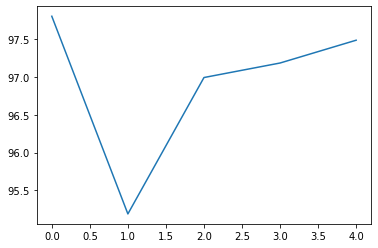

In [34]:

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment( trainX, trainy, testX, testy , repeats=5 ):
	# load data
#	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	plt.plot(scores)
	summarize_results(scores)
  

# run the experiment
run_experiment( trainX, trainy, testX, testy)